<a href="https://colab.research.google.com/github/msudhanshu10/Complete-Data-Science/blob/master/Feature_Engineering_Mean_Median_Mode_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded= files.upload()

Saving train.csv to train.csv


In [2]:
import pandas as pd

In [3]:
df= pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.shape

(891, 12)

Age and Cabin are related to each other. So, they are not MCAR.
But Embarked has no relationship with other variables. Therefore, Embarked is MCAR.

In [8]:
import numpy as np
df['Cabin_null']= np.where(df['Cabin'].isnull(),1,0)

In [12]:
print('Percentage of missing',int((df['Cabin_null'].sum()/df['Cabin'].shape)*100),'%')

Percentage of missing 77 %


In [25]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

People who survived have 60% missing values in cabin while people who died have 87% missing values in Cabin.

In [34]:
cols=['Survived', 'Age', "Fare"]
df1=df[cols]

In [35]:
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [36]:
df1.isna().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [37]:
def impute_nan(df1, feature, median):
  df1[feature+'_median']= df1[feature].fillna(median)

In [42]:
median=np.median(df1[df1['Age'].notna()]['Age'])

In [43]:
impute_nan(df1, 'Age', median)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
df1.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [45]:
df1.isna().mean()

Survived      0.000000
Age           0.198653
Fare          0.000000
Age_median    0.000000
dtype: float64

In [46]:
df1.drop('Age', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
df1.head()

,Survived,Fare,Age_median
0,0,7.2500,22.0
1,1,71.2833,38.0
2,1,7.9250,26.0
3,1,53.1000,35.0
4,0,8.0500,35.0


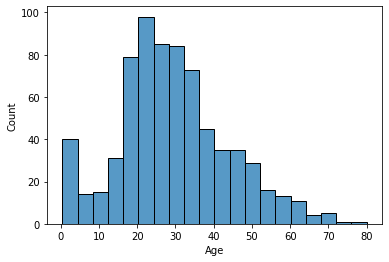

In [49]:
import seaborn as sns
sns.histplot(df['Age'])

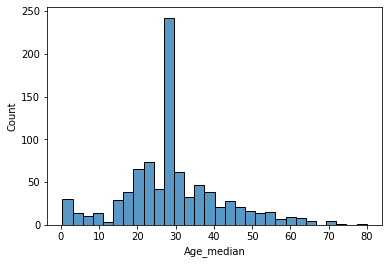

In [50]:
sns.histplot(df1['Age_median'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


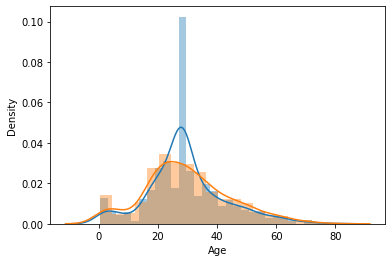

In [52]:
sns.distplot(df1['Age_median'])
sns.distplot(df['Age'])

#### Advantages and Disadvantages of Mean/Median/Mode imputation:

Advantage:

1- Easy to implement.

2- Robust to outliers

3- Faster way to remove nan

Disadvantages:

1- Change in the variance of the data.

2- It impacts correlation.


Apply mode in case of Categorical Data.